In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualización del dataset y obtención de información de sus variables
df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
display(df.head())
display(df.info())
display(df.describe().round(2))
display(df.isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\Gamer\AppData\Local\Temp\ipykernel_12360\2325646537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\Gamer\AppData\Local\Temp\ipykernel_12360\2325646537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\Gamer\AppData\Local\Temp\ipykernel_12360\2325646537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='p

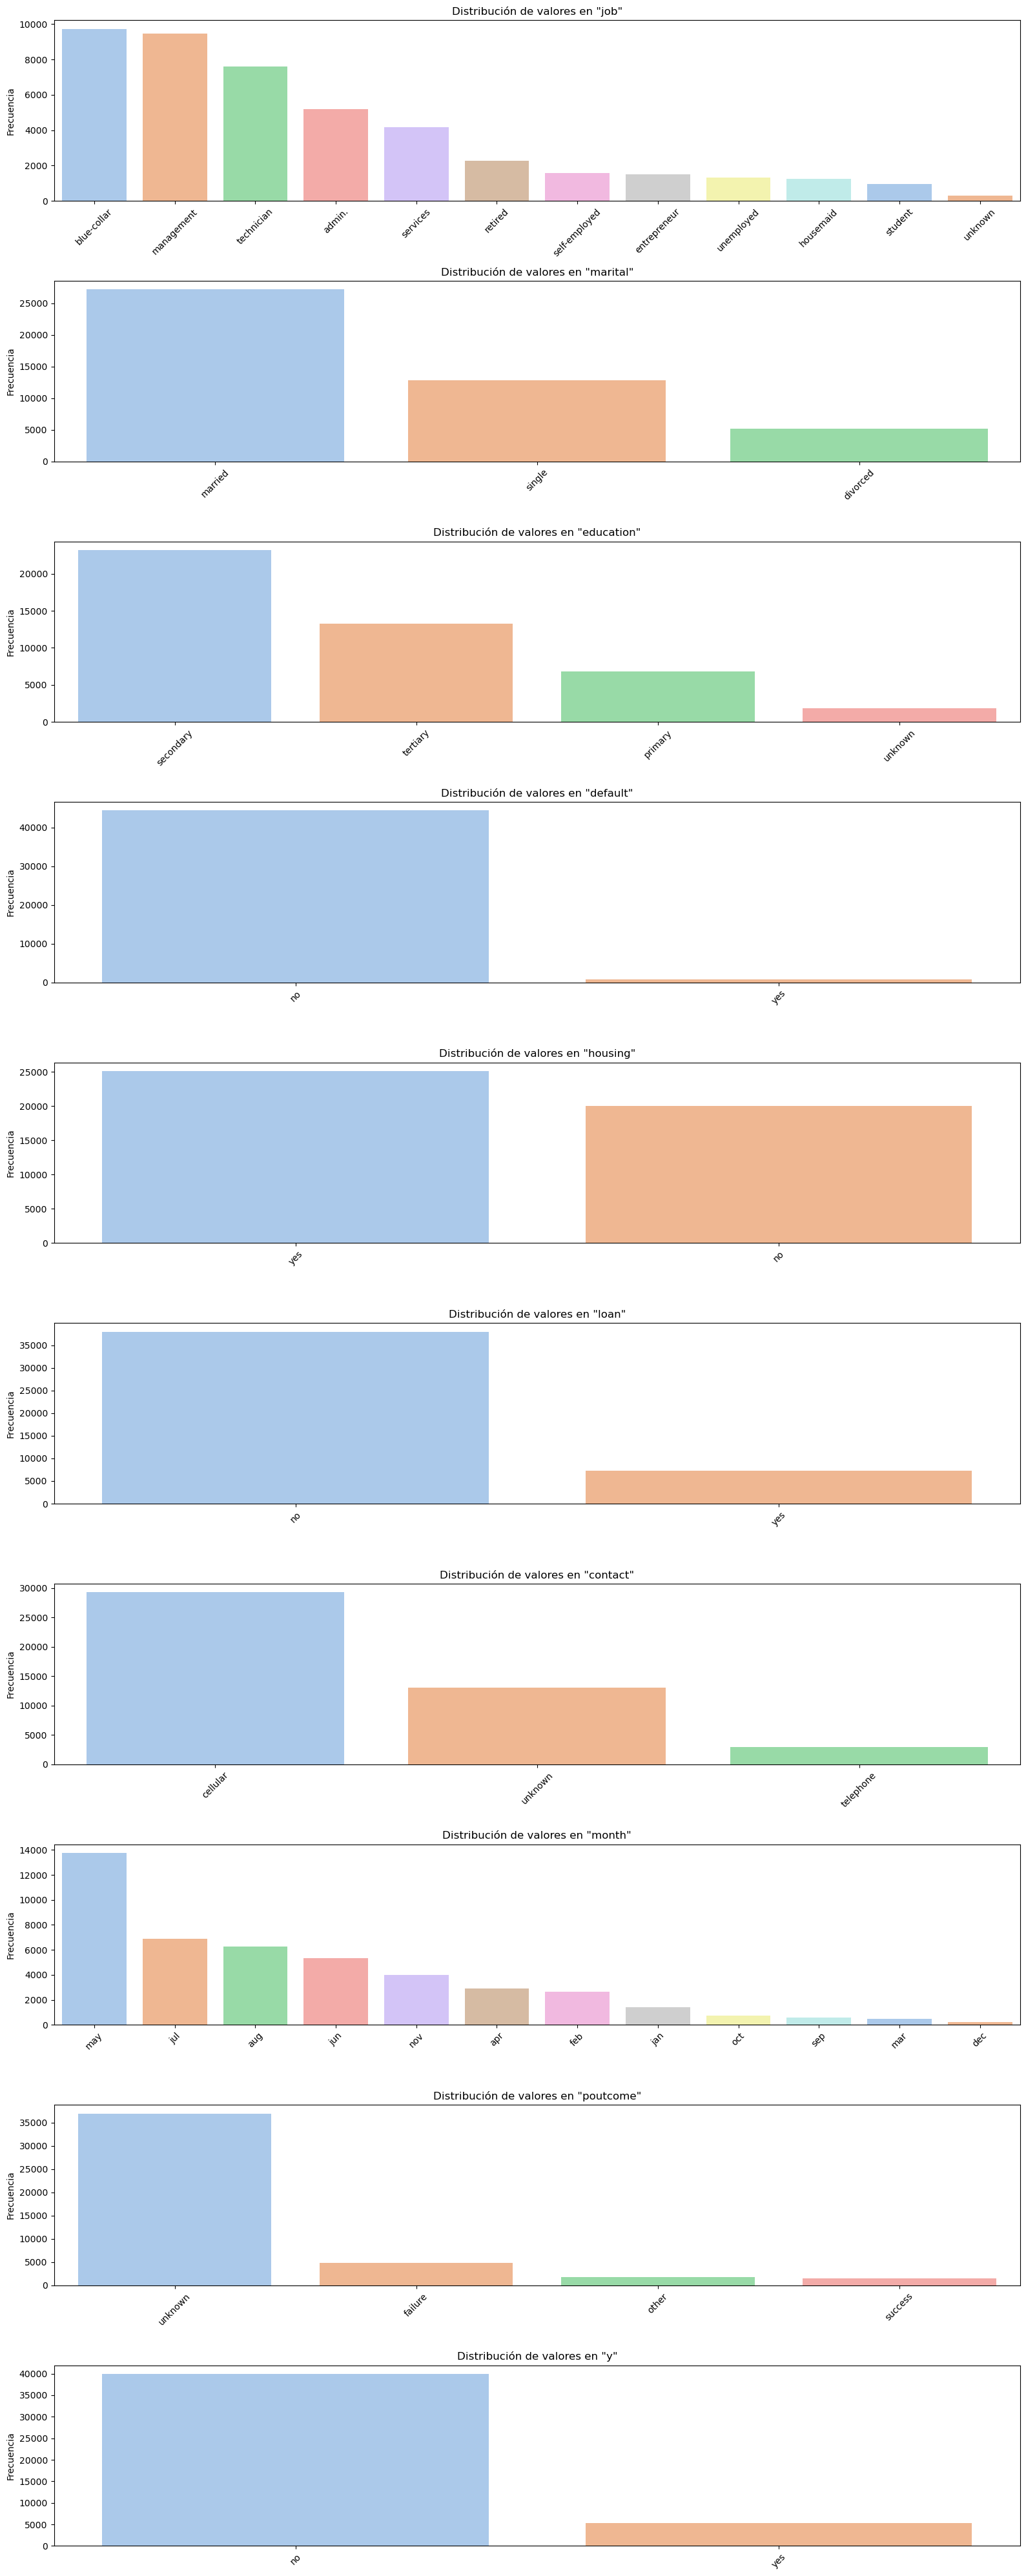

In [3]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(16, len(categorical_cols)*4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Distribución de valores en "{col}"')
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

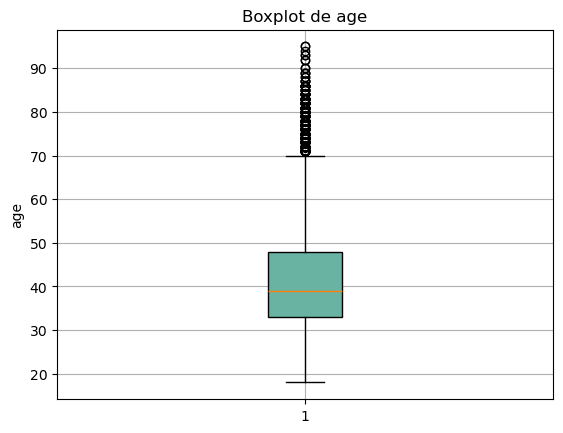

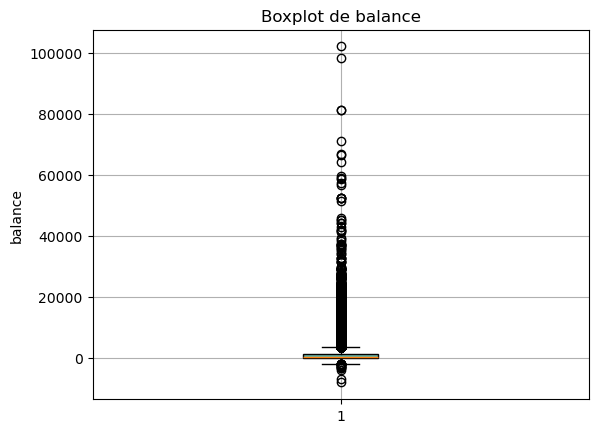

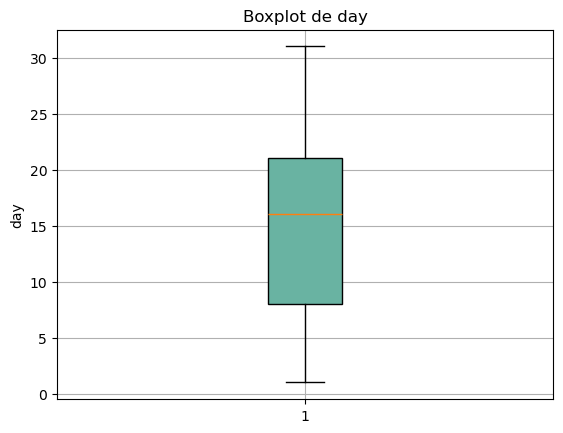

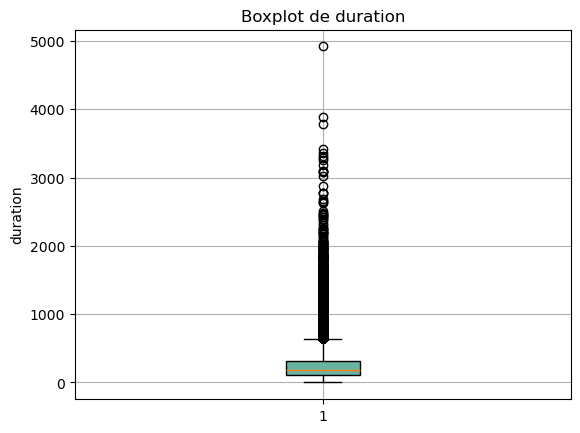

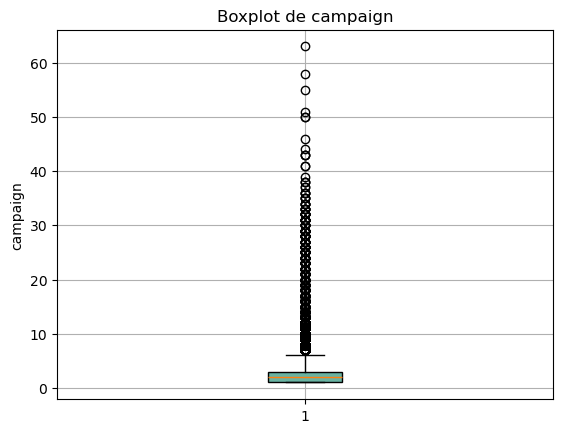

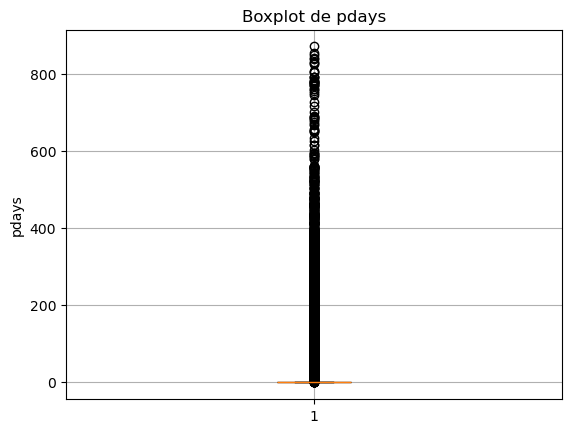

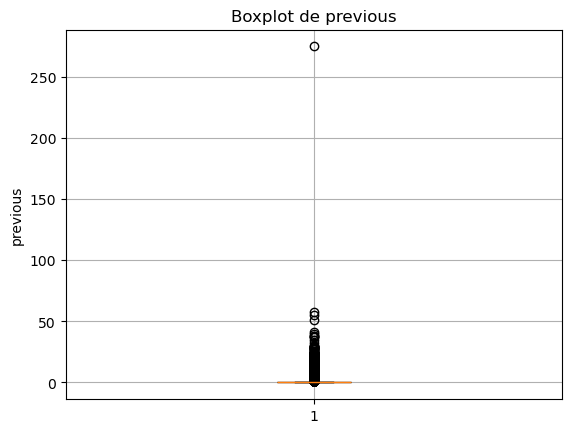

In [4]:
# Filtrar solo columnas numéricas con más de un valor distinto
numeric_cols = [col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 1]

# Crear un boxplot para cada una
for col in numeric_cols:
    plt.figure()
    box = plt.boxplot(df[col].dropna(), patch_artist=True)
    
    # Aplicar color (puedes cambiar el color aquí)
    for patch in box['boxes']:
        patch.set(facecolor='#69b3a2')  # verde-azulado suave

    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [5]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [6]:
# Change the name of education values

education_map= {
    'primary': 'Primary',
    'secondary': 'High School/VET',
    'tertiary': 'Grade/Higher VET ',
    'unknown': 'unknown'
}

df['education_level'] = df['education'].map(education_map)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_level
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Grade/Higher VET
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,High School/VET
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,High School/VET
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,unknown


In [7]:
iq1_age = df['age'].quantile(0.25)
iq3_age = df['age'].quantile(0.75)
iqr_age = iq3_age - iq1_age

lower_age = iq1_age - 1.5 * iqr_age
upper_age = iq3_age + 1.5 * iqr_age

df_clean = df[(df['age'] >= lower_age) & (df['age'] <= upper_age)]
display(df_clean)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_level
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Grade/Higher VET
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,High School/VET
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,High School/VET
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,Grade/Higher VET
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,High School/VET
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Grade/Higher VET
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,High School/VET


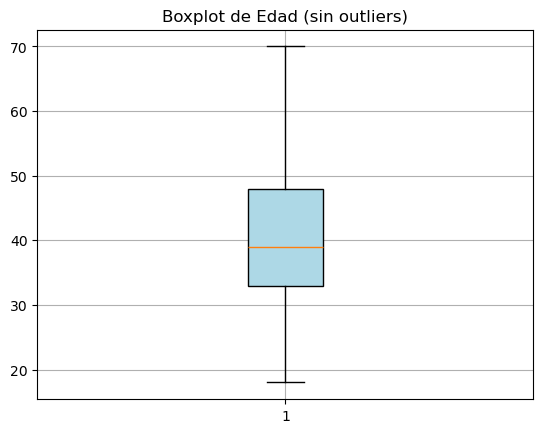

In [8]:
# Crear boxplot para la variable 'age' ya limpia
box = plt.boxplot(df_clean['age'], patch_artist=True)

# Color sencillo
box['boxes'][0].set(facecolor='lightblue')

plt.title('Boxplot de Edad (sin outliers)')
plt.grid(True)
plt.show()

## Visualisation of the study variables


Text(0, 0.5, 'Number of users')

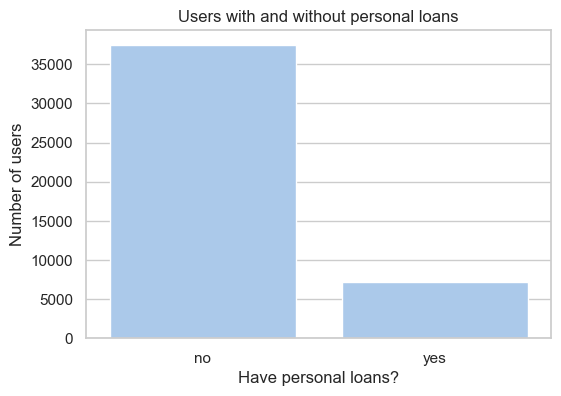

In [45]:
# Setting the chart style for loan values
sns.set_theme(style='whitegrid', palette= 'pastel')

# Count values of loan
loan_counts = df_clean['loan'].value_counts()

# Create the graph
plt.figure(figsize=(6,4))
sns.barplot(x=loan_counts.index, y= loan_counts.values) 

# Titles and labels

plt.title('Users with and without personal loans')
plt.xlabel('Have personal loans?')
plt.ylabel('Number of users')





In [46]:
# types of job
df_clean['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

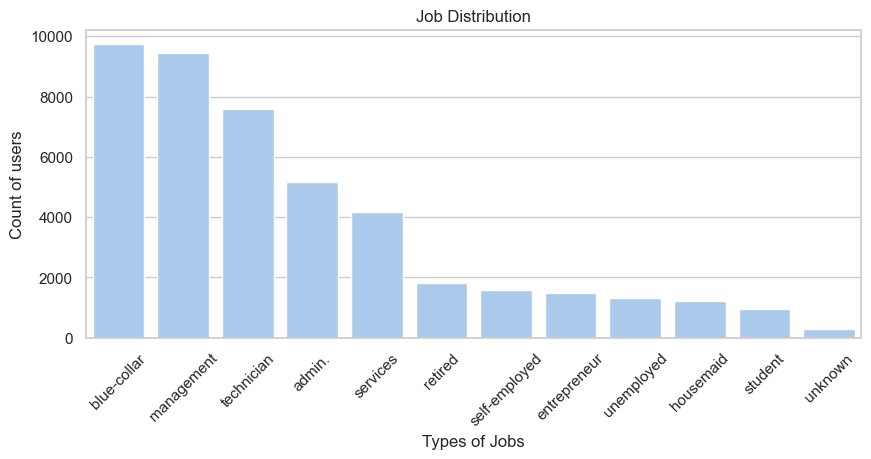

In [ ]:
# Bar chart for job, marital and education
plt.figure(figsize=(10, 4))
sns.countplot(data=df_clean, x= 'job', order= df_clean['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Types of Jobs')
plt.ylabel('Count of users')
plt.show


In [12]:
# ¿DE MEDIA PUEDE TENER UN SOLTERO O DIVORCIADO MÁS PROBABILIDAD DE ACEPTAR EL PRODUCTO FINANCIERO QUE UN CASADO? 
# ¿y UN SOLTERO QUE UN CASADO? ¿SE PREOCUPA MÁS UN DIVORCIADO POR UN PLAN DE AHORRO QUE UN CASADO? (OJO QUE DIVORCIADO INCLUYE TAMBIEN VIUDO)

In [48]:
df_empleo = df_clean.groupby('job')['education_level'].value_counts()
df_empleo

job            education_level  
admin.         High School/VET      4219
               Grade/Higher VET      572
               Primary               207
               unknown               170
blue-collar    High School/VET      5369
               Primary              3757
               unknown               454
               Grade/Higher VET      149
entrepreneur   Grade/Higher VET      685
               High School/VET       541
               Primary               183
               unknown                76
housemaid      Primary               614
               High School/VET       393
               Grade/Higher VET      173
               unknown                44
management     Grade/Higher VET     7795
               High School/VET      1119
               Primary               293
               unknown               238
retired        High School/VET       861
               Primary               595
               Grade/Higher VET      292
               unknown  

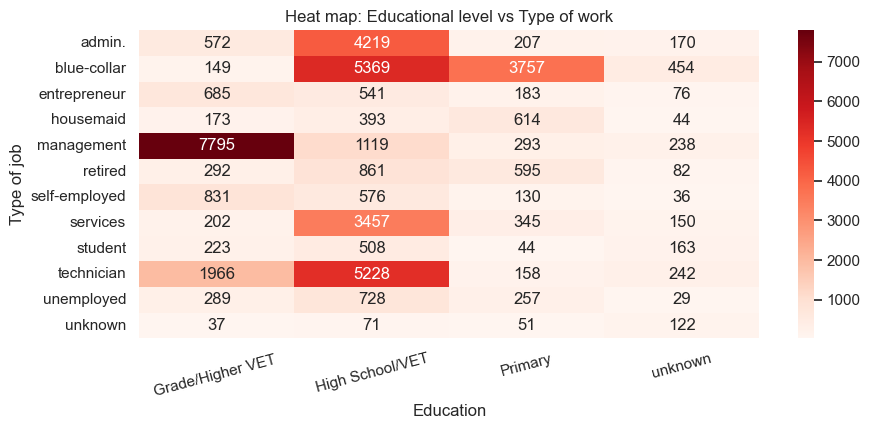

In [49]:
# Relation between education and type of job
df_job_heat = df_clean.groupby(['job', 'education_level']).size().unstack() # --> Unstack Transform the values of the job and education columns into a table. # size is similar than count, but includes null values.
plt.figure(figsize=(10, 4))
sns.heatmap(df_job_heat, annot=True, fmt='g', cmap='Reds') # --> g= general format --> how show the values
plt.title('Heat map: Educational level vs Type of work')
plt.ylabel('Type of job')
plt.xlabel('Education')
plt.xticks(rotation=15)
plt.show()

In [15]:
# What are the most common jobs of unknown education?
df_empleo_reset = df_empleo.reset_index(name='count') # --> converts the index into columns and the Series into a DataFrame.
df_empleo_reset[df_empleo_reset['education_level']== 'unknown'].sort_values(by='count',ascending= False).reset_index(drop=True)

# TENER EN CUENTA QUE HAY ESTUDIOS DESCONOCIDOS CON TRABAJOS DESCONOCIDOS --> VER SI TIENEN UN IMPACTO EN LA MUESTRA Y SI NO ELIMINARLOS

,job,education_level,count
0,blue-collar,unknown,454
1,management,unknown,242
2,technician,unknown,242
3,admin.,unknown,171
4,student,unknown,163
5,services,unknown,150
6,unknown,unknown,127
7,retired,unknown,119
8,entrepreneur,unknown,76
9,housemaid,unknown,45


<function matplotlib.pyplot.show(close=None, block=None)>

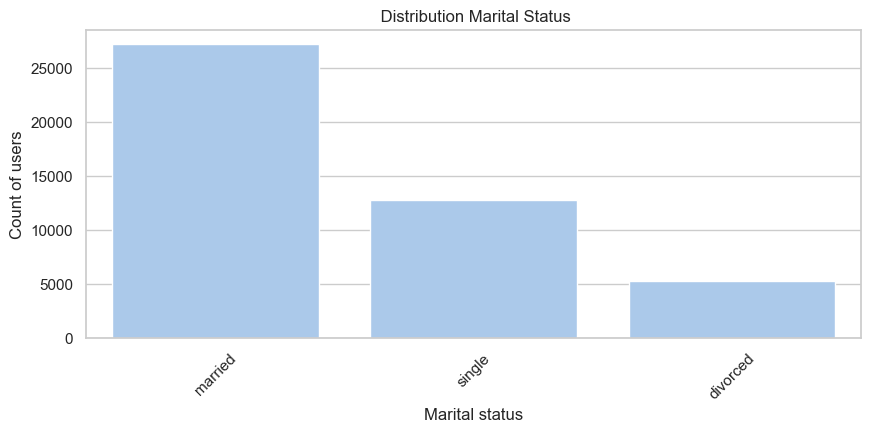

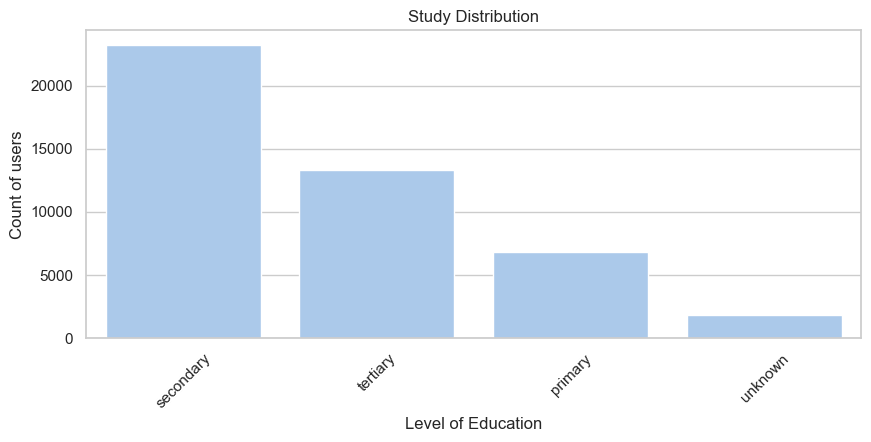

In [16]:
# Bar chart of marital
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'marital', order= df['marital'].value_counts().index)
plt.title(' Distribution Marital Status')
plt.xticks(rotation= 45)
plt.xlabel('Marital status')
plt.ylabel('Count of users')
plt.show

# bar chart of education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'education', order= df['education'].value_counts().index)
plt.title('Study Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Level of Education')
plt.ylabel('Count of users')
plt.show

In [17]:
# group marital status as married or unmarried--> no, porque puede darse que los viudos estén jubilados, habría rarezas en la visualización o no sería una visualización correcta

In [50]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [51]:
# View distribution of marital status and deposit subscribed
df_marital = df_clean.groupby('marital')['y'].value_counts().unstack()

df_marital['total'] = (df_marital['yes'] + df_marital['no'])

df_marital['% yes']= (df_marital['yes'] / df_marital['total']) * 100
df_marital['% no']= (df_marital['no'] / df_marital['total']) * 100
display(df_marital.round(2))


y,no,yes,total,% yes,% no
marital,,,,,
divorced,4526,572,5098,11.22,88.78
married,24258,2590,26848,9.65,90.35
single,10869,1909,12778,14.94,85.06


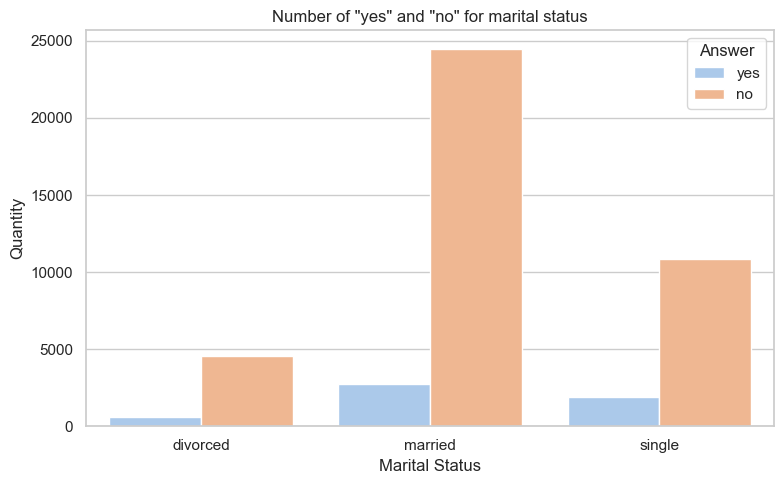

In [20]:
# Crear gráfico de barras agrupadas
plot_marital = df_marital[['yes', 'no']].reset_index().melt(id_vars='marital',
                                                            value_vars= ['yes', 'no'],
                                                            var_name= 'Answer',
                                                            value_name= 'Quantity'
                                                            )
plt.figure(figsize=(8, 5))
sns.barplot(data= plot_marital, x= 'marital', y= 'Quantity', hue= 'Answer', palette= 'pastel')
plt.title('Number of "yes" and "no" for marital status')
plt.xlabel('Marital Status')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


In [21]:
"""
Parece ser que los solteros tienen una ligera propensión a aceptar más estos productos financieros
¿Entre qué edad ronda cada uno?
Weno, paso a paso, primero gráfica
"""

'\nParece ser que los solteros tienen una ligera propensión a aceptar más estos productos financieros\n¿Entre qué edad ronda cada uno?\nWeno, paso a paso, primero gráfica\n'

In [22]:
# Prepare de group of values for visualitation
df_age = df_clean.groupby(['marital', 'y'])['age'].value_counts().unstack()
display(df_age)

age            18    19    20    21    22     23     24     25     26     27  \
marital  y                                                                     
divorced no   NaN   NaN   NaN   NaN   NaN    NaN    1.0    6.0   20.0   16.0   
         yes  NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    2.0   
married  no   NaN   NaN   2.0   4.0   9.0   25.0   43.0   84.0  157.0  204.0   
         yes  NaN   NaN   1.0   1.0   NaN    2.0   10.0   14.0   13.0   29.0   
single   no   5.0  24.0  33.0  53.0  80.0  133.0  190.0  324.0  494.0  548.0   
         yes  7.0  11.0  14.0  21.0  40.0   42.0   58.0   99.0  121.0  110.0   

age           ...    61    62    63    64    65    66    67    68    69    70  
marital  y    ...                                                              
divorced no   ...  10.0   1.0   3.0   5.0   7.0   3.0   1.0   NaN   5.0   8.0  
         yes  ...   9.0   5.0   4.0   4.0   2.0   2.0   7.0   6.0   3.0   5.0  
married  no   ...  76.0  40.0  43.0  34.0  31.0  31.0  28.0  13.0  21.0  41.0  
         yes  ...  47.0  34.0  25.0  31.0  19.0  22.0  15.0  13.0  13.0  12.0  
single   no   ...   4.0   NaN   1.0   NaN   NaN   5.0   2.0   2.0   1.0   1.0  
         yes  ...   1.0   NaN   1.0   NaN   NaN   NaN   1.0   2.0   1.0   NaN  

[6 rows x 53 columns]

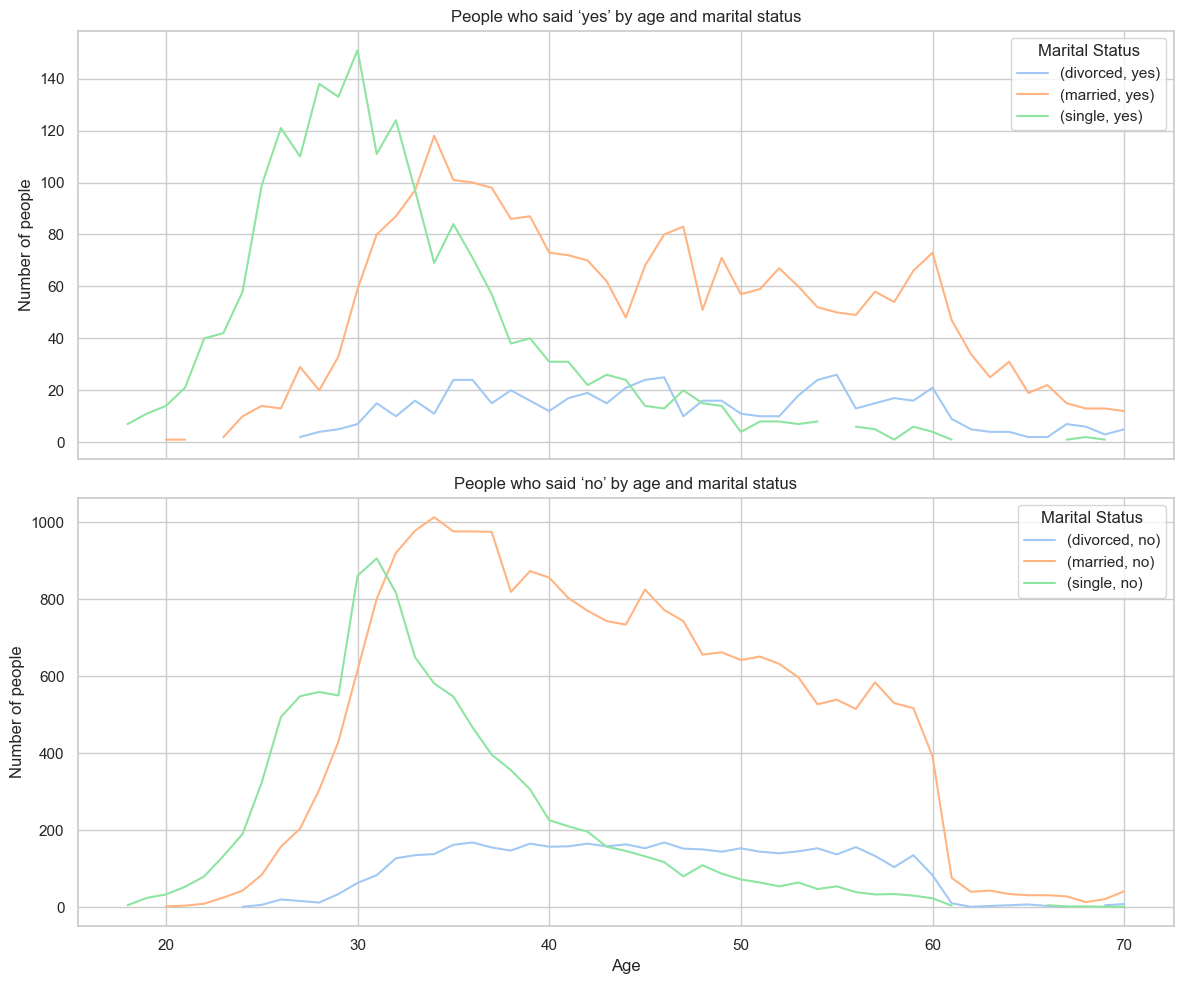

In [23]:
# Transponemos si no está ya
df_plot_age = df_age.T

# Filtramos columnas para cada gráfico
cols_yes = [col for col in df_plot_age.columns if col[1] == 'yes']
cols_no = [col for col in df_plot_age.columns if col[1] == 'no']

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico para "yes"
df_plot_age[cols_yes].plot(ax=ax1)
ax1.set_title('People who said ‘yes’ by age and marital status')
ax1.set_ylabel('Number of people')
ax1.legend(title='Marital Status')

# Gráfico para "no"
df_plot_age[cols_no].plot(ax=ax2)
ax2.set_title('People who said ‘no’ by age and marital status')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of people')
ax2.legend(title='Marital Status')

plt.tight_layout()
plt.show()



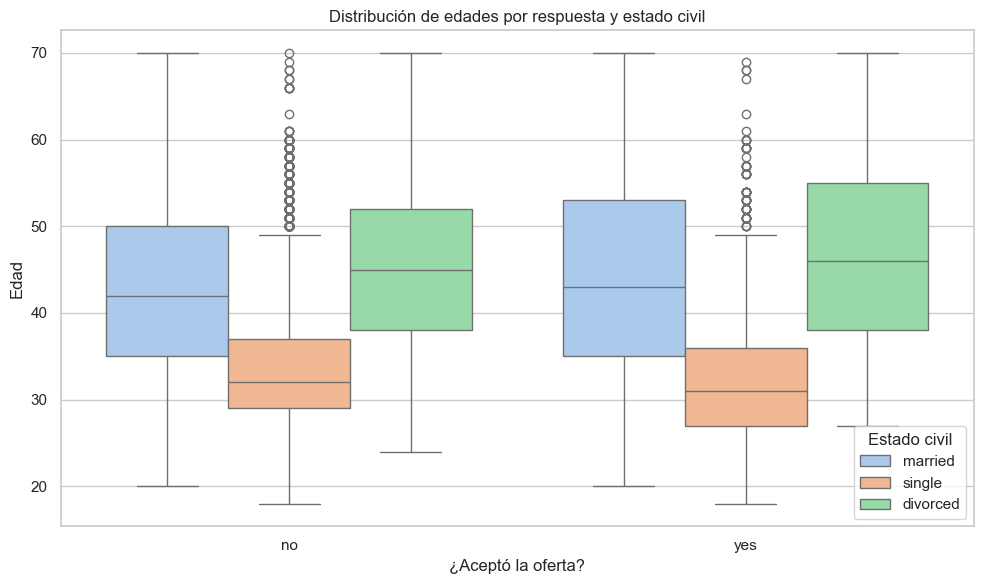

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='y', y='age', hue='marital', palette='pastel')
plt.title('Distribución de edades por respuesta y estado civil')
plt.xlabel('¿Aceptó la oferta?')
plt.ylabel('Edad')
plt.legend(title='Estado civil')
plt.tight_layout()
plt.show()

In [25]:
# calculate the average age of acceptance and rejection
df_age_mean = df_clean.groupby(['marital', 'y'])['age'].mean().unstack()
df_age_mean = df_age_mean[['yes', 'no']] # me da tok que salga el no primero
print(df_age_mean)

y               yes         no
marital                       
divorced  46.753497  44.878259
married   44.604633  42.782134
single    32.152960  33.929616


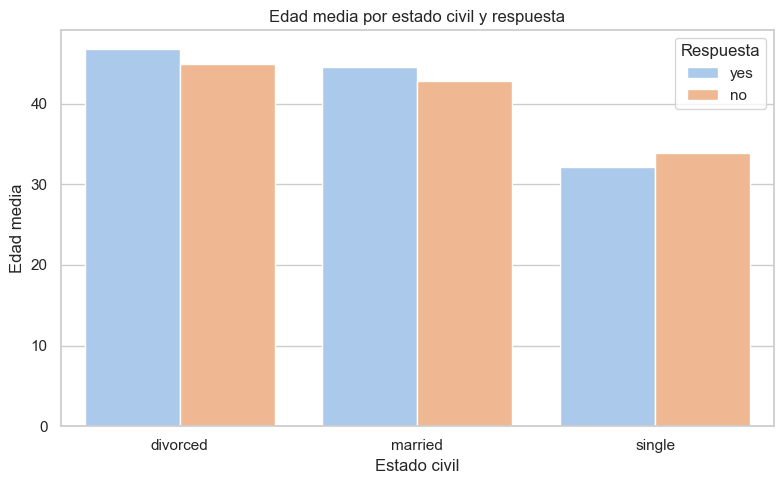

In [26]:
# Bar chart for age mean by marital status and answer
mean_age = df_age_mean[['yes', 'no']].reset_index().melt(id_vars='marital', 
                                                   var_name='Respuesta', 
                                                   value_name='Edad media')

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_age, x='marital', y='Edad media', hue='Respuesta', palette='pastel')
plt.title('Edad media por estado civil y respuesta')
plt.ylabel('Edad media')
plt.xlabel('Estado civil')
plt.tight_layout()
plt.show()


In [27]:
"""
Muestra una tendencia de edades, 
¿solteros jóvenes aceptan más?¿Divorciados/Viudos tiene más o la misma aceptación que los casados a estos productos cuanto más mayor? 
 Consultar que más puede ser curioso de esto
"""

'\nMuestra una tendencia de edades, \n¿solteros jóvenes aceptan más?¿Divorciados/Viudos tiene más o la misma aceptación que los casados a estos productos cuanto más mayor? \n Consultar que más puede ser curioso de esto\n'

In [54]:
df_clean['y'].value_counts()

y
no     39653
yes     5071
Name: count, dtype: int64

In [ ]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [ ]:
# Analize default
print(df_clean['default'].value_counts())

df_default= df_clean.groupby(['marital', 'education_level'])['default'].value_counts()
display(df_default)

default
no     44396
yes      815
Name: count, dtype: int64


marital   education_level    default
divorced  Grade/Higher VET   no          1433
                             yes           38
          High School/VET    no          2751
                             yes           64
          Primary            no           731
                             yes           21
          unknown            no           164
                             yes            5
married   Grade/Higher VET   no          6934
                             yes          104
          High School/VET    no         13527
                             yes          243
          Primary            no          5162
                             yes           84
          unknown            no          1143
                             yes           17
single    Grade/Higher VET   no          4736
                             yes           56
          High School/VET    no          6466
                             yes          151
          Primary            no           8

,marital,education_level,default,count
0,divorced,Grade/Higher VET,no,1433
1,divorced,Grade/Higher VET,yes,38
2,divorced,High School/VET,no,2751
3,divorced,High School/VET,yes,64
4,divorced,Primary,no,731


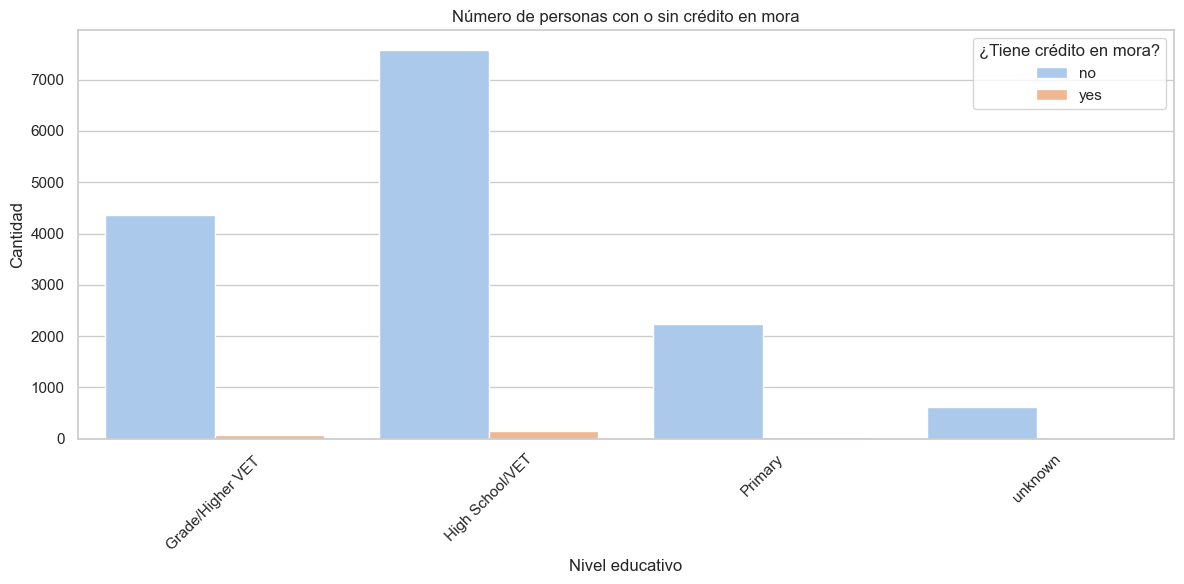

In [31]:
# Change format for display
df_plot = df_default.reset_index(name='count')
display(df_plot.head())

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, 
            x='education_level', 
            y='count', 
            hue='default', 
            palette='pastel',
            errorbar=None)

plt.title('Número de personas con o sin crédito en mora')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='¿Tiene crédito en mora?')
plt.tight_layout()
plt.show()

In [32]:
# Calculate the proportion of non-performing loans by marital status and level of education
df_default = df_default.unstack()
df_default['total']= df_default['yes'] + df_default['no']
df_default['% yes']= (df_default['yes'] / df_default['total'])*100
#df_default['% no']= (df_default['no'] / df_default['total'])*100

display(df_default['% yes'].round(2))

# default_mean = len(df_default['% yes']) --> En variables categóricas o binarias creo que la proporción y la media es la misma, solo se diferencia por su multiplicación por 100
len(df[df['default'] == 'yes']) 

marital   education_level  
divorced  Grade/Higher VET     2.58
          High School/VET      2.27
          Primary              2.79
          unknown              2.96
married   Grade/Higher VET     1.48
          High School/VET      1.76
          Primary              1.60
          unknown              1.47
single    Grade/Higher VET     1.17
          High School/VET      2.28
          Primary              2.58
          unknown              1.89
Name: % yes, dtype: float64

815

In [33]:
print(df_age.index.levels) # no hay education level en df_age, si quiero ver el rango de edad de single con estudios altos debo crearlo


[['divorced', 'married', 'single'], ['no', 'yes']]


In [34]:
# Want to see the ages of people wit most and less default loan
default_age_yes = df_clean[df_clean['default'] == 'yes']
df_age_values = default_age_yes.groupby(['marital', 'education_level'])['age'].mean().reset_index(name= 'mean_age')
display(df_age_values)

# Comprobar que tiene un sentido
# prueba_edad = default_age_yes.groupby('marital')['age'].value_counts().reset_index(name='count')
# print(prueba_edad[prueba_edad['marital'] == 'single'])

,marital,education_level,mean_age
0,divorced,Grade/Higher VET,41.702703
1,divorced,High School/VET,43.781250
2,divorced,Primary,44.809524
3,divorced,unknown,40.400000
4,married,Grade/Higher VET,42.596154
5,married,High School/VET,40.629630
6,married,Primary,43.047619
7,married,unknown,42.176471
8,single,Grade/Higher VET,34.821429
9,single,High School/VET,32.721854


In [ ]:
# cuantas personas han aceptado el producto teneindo préstamos en mora?
default_yes = df_clean[df_clean['default'] == 'yes']
df_default_y = default_yes.groupby(['marital', 'education_level'])['y'].value_counts().unstack()#.fillna(0).astype(int)
df_default_y['total'] = df_default_y['yes'] + df_default_y['no']
df_default_y['% yes'] = ((df_default_y['yes'] / df_default_y['total'])*100).round(2)
display(df_default_y)


y                              no   yes  total  % yes
marital  education_level                             
divorced Grade/Higher VET    33.0   5.0   38.0  13.16
         High School/VET     62.0   2.0   64.0   3.12
         Primary             19.0   2.0   21.0   9.52
         unknown              3.0   2.0    5.0  40.00
married  Grade/Higher VET    99.0   5.0  104.0   4.81
         High School/VET    232.0  11.0  243.0   4.53
         Primary             82.0   2.0   84.0   2.38
         unknown             15.0   2.0   17.0  11.76
single   Grade/Higher VET    52.0   4.0   56.0   7.14
         High School/VET    136.0  15.0  151.0   9.93
         Primary             20.0   2.0   22.0   9.09
         unknown             10.0   NaN    NaN    NaN

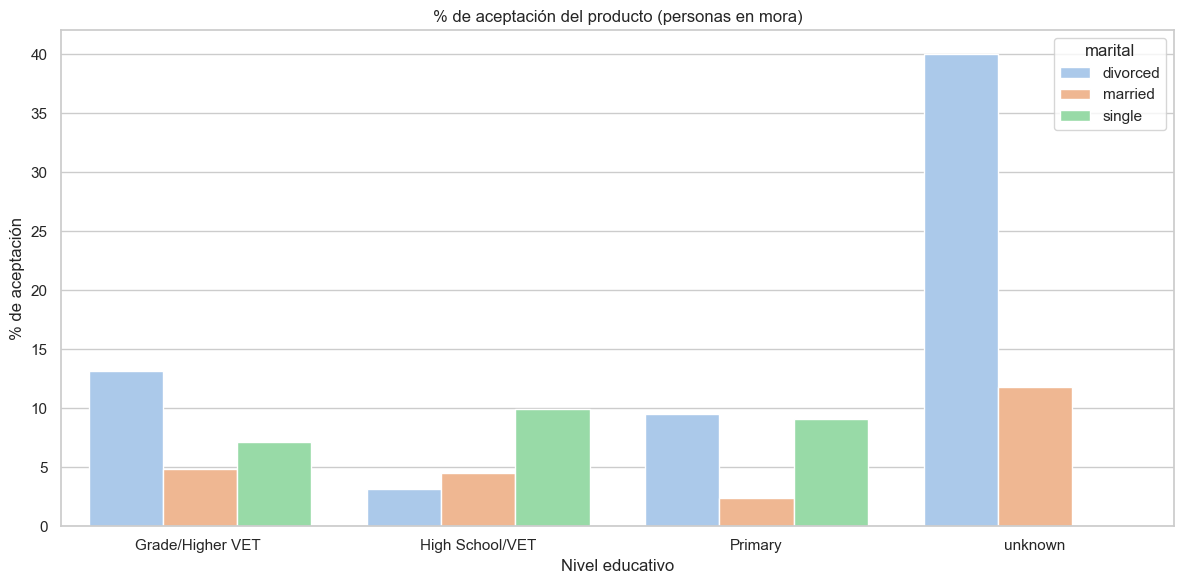

In [36]:
# Bar chart for default and acept
plot_default_y = df_default_y.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_default_y, x='education_level', y='% yes', hue='marital', palette='pastel')

plt.title('% de aceptación del producto (personas en mora)')
plt.xlabel('Nivel educativo')
plt.ylabel('% de aceptación')
plt.tight_layout()
plt.show()

In [37]:
"""
¿El mayor número de prestamos en demora de pago lo tienen las personas divorciadas de las cuales su nivel de estudio se desconoce?
Los casados tienen en proporcion una menor cantidad de endeudamiento

El grupo de personas que cuenta con un mayor número de préstamos en mora son los divorciados con un nivel de estudios básico, que además cuentan con la edad media más alta.
"""

'\n¿El mayor número de prestamos en demora de pago lo tienen las personas divorciadas de las cuales su nivel de estudio se desconoce?\nLos casados tienen en proporcion una menor cantidad de endeudamiento\n\nEl grupo de personas que cuenta con un mayor número de préstamos en mora son los divorciados con un nivel de estudios básico, que además cuentan con la edad media más alta.\n'

y                              no   yes  total  %_yes
marital  education_level                             
divorced Grade/Higher VET    1268   203   1471  16.01
         High School/VET     2524   291   2815  11.53
         Primary              648   104    752  16.05
         unknown              145    24    169  16.55
married  Grade/Higher VET    6125   913   7038  14.91
         High School/VET    12466  1304  13770  10.46
         Primary             4850   396   5246   8.16
         unknown             1018   142   1160  13.95
single   Grade/Higher VET    3912   880   4792  22.49
         High School/VET     5762   855   6617  14.84
         Primary              762    91    853  11.94
         unknown              442    86    528  19.46

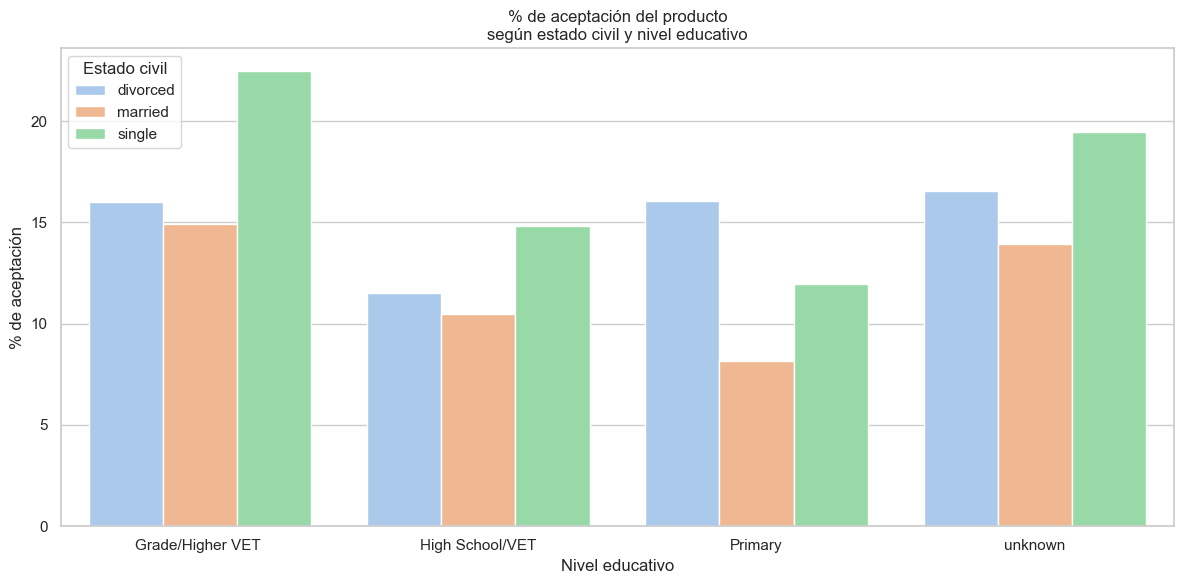

In [ ]:
# Crear gráfico de barras agrupadas
df_marital_y = df_clean.groupby(['marital', 'education_level'])['y'].value_counts().unstack()#.reset_index(name= 'count')
df_marital_y['total'] = df_marital_y['yes'] + df_marital_y['no']
df_marital_y['%_yes'] = ((df_marital_y['yes'] / df_marital_y['no'])*100).round(2)
display(df_marital_y)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_marital_y, x='education_level', y='%_yes', hue='marital', palette='pastel', errorbar=None)

plt.title('% de aceptación del producto\nsegún estado civil y nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('% de aceptación')
plt.legend(title='Estado civil')
plt.tight_layout()
plt.show()

In [ ]:
# number of people who said yes according to their marital status
count_marital= df_clean[df_clean['y'] == 'yes']['marital'].value_counts()
display(count_marital)


marital
married     2755
single      1912
divorced     622
Name: count, dtype: int64

In [40]:
""" 
¿Hay una mayor predisposición por parte de los solteros para aceptar el producto fianciero?
¿Los casados con nivel de estudios básico tanto con prestamos en mora como sin ellos son más propensos a no aceptar estos productos?
"""

' \n¿Hay una mayor predisposición por parte de los solteros para aceptar el producto fianciero?\n¿Los casados con nivel de estudios básico tanto con prestamos en mora como sin ellos son más propensos a no aceptar estos productos?\n'

In [ ]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [ ]:
# Analisis de loan y housing
df_clean['loan'].value_counts()
display(df_clean.groupby('loan')['housing'].value_counts().reset_index(name='values'))
df_loan= df_clean.groupby(['loan', 'housing'])['y'].value_counts().reset_index(name= 'yes_or_no')
display(df_loan)

,loan,housing,values
0,no,yes,20763
1,no,no,17204
2,yes,yes,4367
3,yes,no,2877


,loan,housing,y,yes_or_no
0,no,no,no,14069
1,no,no,yes,3135
2,no,yes,no,19093
3,no,yes,yes,1670
4,yes,no,no,2658
5,yes,no,yes,219
6,yes,yes,no,4102
7,yes,yes,yes,265


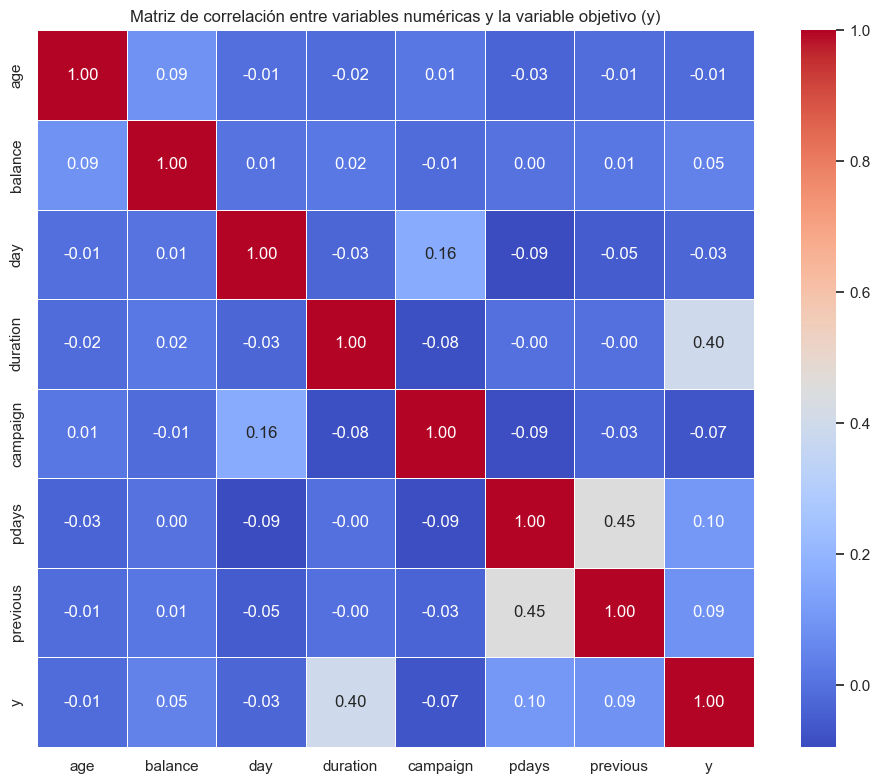

In [55]:
# Preparamos la variable para poder realizar la correlación
df_corr = df_clean.copy()
df_corr['y'] = df_corr['y'].map({'no': 0, 'yes': 1})
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

corr_matrix = df_corr[num_cols].corr()
# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)

plt.title('Matriz de correlación entre variables numéricas y la variable objetivo (y)')
plt.tight_layout()
plt.show()

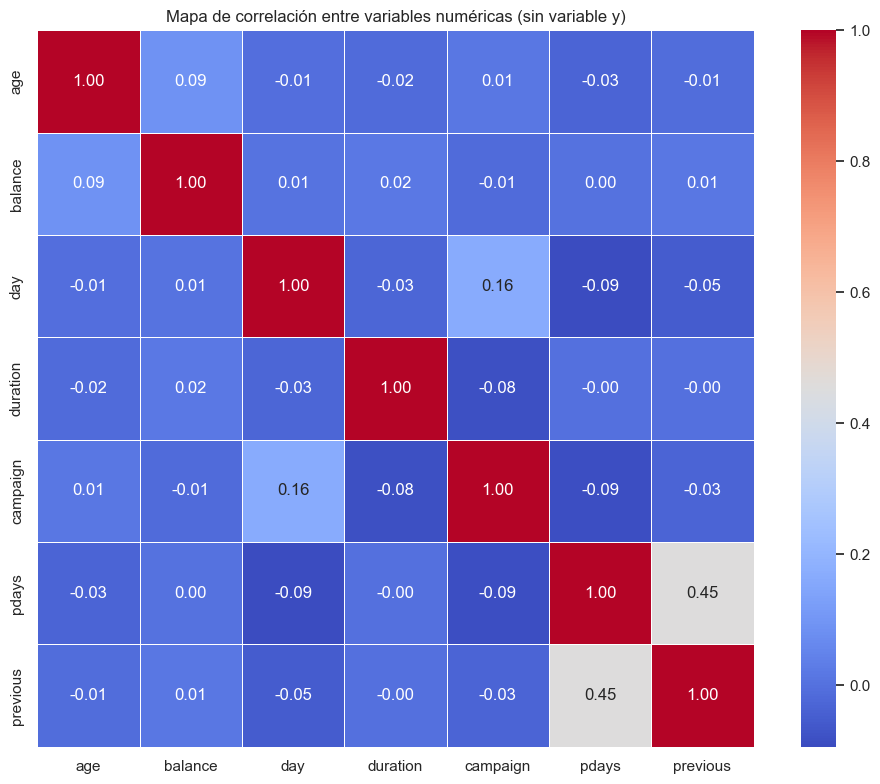

In [56]:
# 2. Seleccionar solo las columnas numéricas, excluyendo 'y'
num_df = df_corr.select_dtypes(include='number').drop(columns='y', errors='ignore')

# 3. Calcular matriz de correlación
correlation_matrix = num_df.corr()

# 4. Dibujar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Mapa de correlación entre variables numéricas (sin variable y)')
plt.tight_layout()
plt.show()

In [58]:
from scipy.stats import chi2_contingency

# Ejemplo con 'marital'
tabla = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi-cuadrado marital vs y: {chi2:.2f}, p-valor: {p:.4f}")

Chi-cuadrado marital vs y: 196.50, p-valor: 0.0000


In [61]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [63]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Ejemplo con 'education'
tabla = pd.crosstab(df['default'], df['y'])
cramers = cramers_v(tabla)
print(f"Cramér's V (education vs y): {cramers:.3f}")

Cramér's V (education vs y): 0.022


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')

# Variable objetivo
y = df['y'].map({'yes': 1, 'no': 0})

# Variables predictoras (puedes cambiar o añadir más si lo deseas)
X = df[['age', 'balance', 'duration', 'job', 'marital', 'education']]


numeric_features = ['age', 'balance', 'duration']
categorical_features = ['job', 'marital', 'education']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_log = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

modelo_log.fit(X_train, y_train)

y_pred = modelo_log.predict(X_test)

print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\n✅ Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

import numpy as np

# Extraer nombres de las columnas codificadas
feature_names = numeric_features + list(
    modelo_log.named_steps['preprocessing']
    .transformers_[1][1]  # OneHotEncoder
    .get_feature_names_out(categorical_features)
)

# Coeficientes del modelo
coef = modelo_log.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coef})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Visualizar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.title("Importancia de las variables en la regresión logística")
plt.grid(True)
plt.tight_layout()
plt.show()

